# CADEC corpus

D'entrada, importem les dependències necessàries:

In [1]:
import numpy as np
import spacy
import nltk
import svgling
import seaborn as sns
import matplotlib.pyplot as plt
from complete_class import CompleteNER

Llegim les dades del fitxer i les passem a llistes de tuples (el format que fa servir el nostre tagger)

In [ ]:
def read_data_from_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        sentence = []
        for line in file:
            if line.strip() and len(line.split('\t')) > 1:  # If line is not empty
                word, adr, Di, Dr, S, F = line.strip().split('\t')
                some = False
                if adr != "O":
                    sentence.append((word, adr[:2] + "ADR"))
                    some = True
                if Di != "O":
                    sentence.append((word, Di[:2] + "Di"))
                    some = True
                if Dr != "O":
                    sentence.append((word, Dr[:2] + "Dr"))
                    some = True
                if S != "O":
                    sentence.append((word, S[:2] + "S"))
                    some = True
                if F != "O":
                    sentence.append((word, F[:2] + "F"))
                    some = True
                if not some:
                    sentence.append((word, "O"))
            elif sentence != []:
                data.append(sentence)
                sentence = []
    return data

train_data = read_data_from_file("./data/CADEC/train.conll")
test_data = read_data_from_file("./data/CADEC/test.conll")

Creem el tagger

In [3]:
cadec_tagger = CompleteNER(train_data, [], test_data, language="esp", postag=False, custom=True)

Només aquelles features que considerem importants

In [10]:
features = {
			'CAPITALIZATION': True,
			'HAS_UPPER': True,
			'HAS_NUM': True,
			'PUNCTUATION': True,
			'SUF': True,
            'PRE': True,
            '2NEXT': True,
            '2PREV': True,
			'WORD': True,
			'LEN': True,
			'NEXT': True,
			'POS': True,
			'LEMMA': False,
			'CITY': False,
			'COMPANY': True,
			'CELEBRITY': False,
			'RESEARCH_ORGANIZATION': False,
			'NAME': False,
			'SURNAME': False,
			'PREV': True,
			'NEXT': True,
			'NUMBER': True,
			'GENDER': True,
			'PERSON': True,
			'PRONTYPE': False,
			'DEP': False,
			'HEAD_DISTANCE': False,
			'HEAD': False
		}

In [13]:
cadec_tagger.train(verbose=True, file="cadec.mdl", feature_opt=features, training_opt={'period':60})

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 56663
Seconds required: 0.190

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 60
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 125568.479029
Feature norm: 1.000000
Error norm: 80756.826749
Active features: 56663
Line search trials: 1
Line search step: 0.000010
Seconds required for this iteration: 0.126

***** Iteration #2 *****
Loss: 72608.105079
Feature norm: 2.734262
Error norm: 23560.323264
Active features: 56663
Line search trials: 2
Line search step: 0.351509
Seconds required for this iteration: 0.121

***** Iteration #3 *****
Loss: 65958.680795
Feature norm: 2.551723
Error norm: 18800.234090
Active features: 56663
Line search trials: 1
Line search step: 1.000000
Seconds requ

Sentence index: 0
GOLD sentence:  [('Dry', 'B-ADR'), ('mouth', 'I-ADR'), ('.', 'O')]
PRED sentence:  [('Dry', 'O'), ('mouth', 'O'), ('.', 'O')]
ERROR 0 --- Gold: ('Dry', 'B-ADR') Predicted: ('Dry', 'O')
ERROR 1 --- Gold: ('mouth', 'I-ADR') Predicted: ('mouth', 'O')

Sentence index: 3
GOLD sentence:  [('I', 'O'), ('take', 'O'), ('it', 'O'), ('with', 'O'), ('2', 'O'), ('propain', 'B-Dr'), ('(', 'O'), ('40', 'O'), ('mg', 'O'), ('each', 'O'), (')', 'O'), ('at', 'O'), ('a', 'O'), ('time', 'O'), (',', 'O'), ('or', 'O'), ('2', 'O'), ('mypaid', 'B-Dr'), ('forte', 'I-Dr'), ('(', 'O'), ('Ibuprofen', 'B-Dr'), ('400', 'I-Dr'), ('mg', 'I-Dr'), ('Paracetamol', 'B-Dr'), ('325', 'I-Dr'), ('mg', 'I-Dr'), ('each', 'O'), (')', 'O'), ('(', 'O'), ('Don', 'O'), ("'", 'O'), ('t', 'O'), ('do', 'O'), ('this', 'O'), ('!!!)', 'O'), ('and', 'O'), ('it', 'O'), ('don', 'O'), ("'", 'O'), ('t', 'O'), ('work', 'O'), ('for', 'O'), ('more', 'O'), ('than', 'O'), ('an', 'O'), ('hour', 'O'), ('.', 'O')]
PRED sentence:  [('

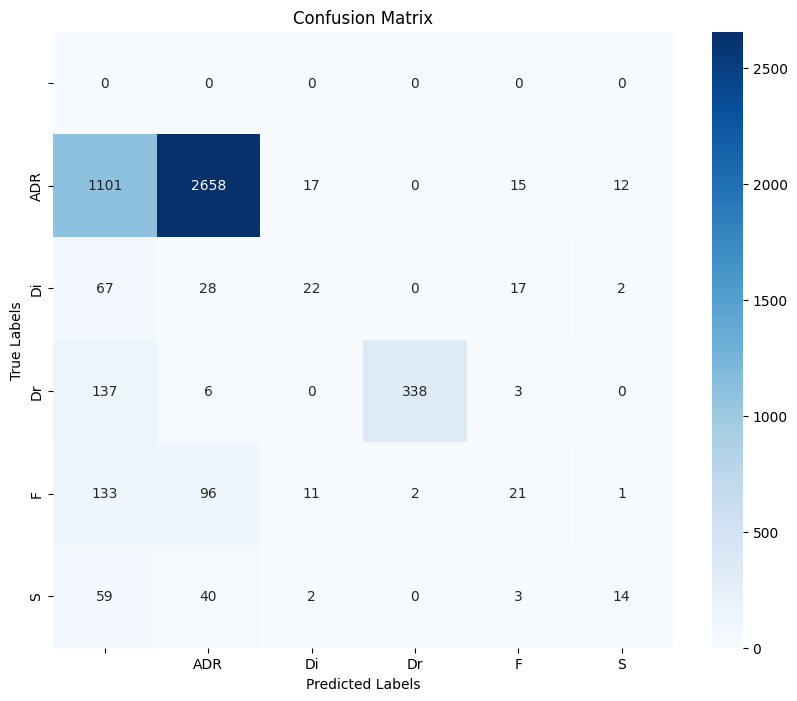

(0.6794285714285714,
 0.559266227657573,
 0.6135190918472652,
 2678,
 0.9114019798072812,
 array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.101e+03, 2.658e+03, 1.700e+01, 0.000e+00, 1.500e+01, 1.200e+01],
        [6.700e+01, 2.800e+01, 2.200e+01, 0.000e+00, 1.700e+01, 2.000e+00],
        [1.370e+02, 6.000e+00, 0.000e+00, 3.380e+02, 3.000e+00, 0.000e+00],
        [1.330e+02, 9.600e+01, 1.100e+01, 2.000e+00, 2.100e+01, 1.000e+00],
        [5.900e+01, 4.000e+01, 2.000e+00, 0.000e+00, 3.000e+00, 1.400e+01]]))

In [15]:
cadec_tagger.test(verb=True, plot=True)